## Limpieza de datos

In [70]:
import pandas as pd
import seaborn as sns

In [71]:
data = pd.read_csv('data.txt')


In [72]:
data.head()
data = data.drop('date', axis=1)
data


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [73]:
# Especifica el valor y el caracter que deseas eliminar
valor_a_eliminar = 'finishing ' # Reemplaza 'valor_a_eliminar' con el valor específico que deseas filtrar
caracter_a_eliminar = ' '  # Reemplaza 'caracter_a_eliminar' con el caracter que deseas eliminar

# Reemplazar el caracter en las celdas con el valor especificado
data['department'] = data['department'].str.replace(caracter_a_eliminar, '')

# Imprimir el DataFrame actualizado
# print(data)

In [74]:
data['department'].unique()

array(['sweing', 'finishing'], dtype=object)

In [75]:
datacopy = data
data_sin_nulos = datacopy.dropna(subset=['wip'])
# Calcular la media de 'wip' para cada combinación de 'department' y 'team'
media_wip_por_combinacion = datacopy.groupby(['department', 'team'])['wip'].mean()

# Imprimir la media de 'wip' por combinación de 'department' y 'team'
print("Media de 'wip' por combinación de 'department' y 'team':")
print(media_wip_por_combinacion)


Media de 'wip' por combinación de 'department' y 'team':
department  team
finishing   1               NaN
            2               NaN
            3               NaN
            4               NaN
            5               NaN
            6               NaN
            7               NaN
            8               NaN
            9               NaN
            10              NaN
            11              NaN
            12              NaN
sweing      1       1609.196429
            2       1326.280702
            3       1409.293103
            4       1218.677966
            5        773.741379
            6        936.559322
            7        999.509091
            8        984.375000
            9       1283.724138
            10      1528.333333
            11       968.135593
            12      1259.915254
Name: wip, dtype: float64


In [76]:
datos_finishing = data[data['department'] == 'finishing']

if datos_finishing['wip'].isnull().all():
    print("Todos los valores en la lista resultante son vacíos.")
else:
    print("Al menos un valor en la lista resultante no es vacío.")


Todos los valores en la lista resultante son vacíos.


In [77]:
# Calcular el valor promedio de 'wip' para cada equipo
promedio_wip_por_equipo = data.groupby('team')['wip'].mean()
promedio_wip_por_equipo

team
1     1609.196429
2     1326.280702
3     1409.293103
4     1218.677966
5      773.741379
6      936.559322
7      999.509091
8      984.375000
9     1283.724138
10    1528.333333
11     968.135593
12    1259.915254
Name: wip, dtype: float64

In [78]:
data.iloc[1,6]

nan

In [79]:
datac = data# Recorrer las filas de la columna 'wip'
for indice, valor_wip in enumerate(datac['wip']):
    # Verificar si el valor de 'wip' en la fila actual es nulo o faltante
    if pd.isnull(valor_wip):
        equipo = datac.iloc[indice, 3]
        media = promedio_wip_por_equipo[equipo]
        print(indice), print(equipo)
        datac.iloc[indice, 6] = media
datac.head(50)
data = datac

1
1
6
2
13
10
14
8
15
4
16
7
18
11
19
4
20
11
21
9
22
3
23
1
33
2
35
10
38
8
39
7
40
3
41
9
42
1
44
4
52
2
53
10
57
8
58
7
60
11
61
1
62
11
63
4
64
3
66
9
67
2
76
10
77
5
80
7
81
8
83
4
84
1
85
3
86
11
87
9
90
10
91
2
101
8
103
7
104
1
105
9
109
3
110
4
111
2
112
10
113
7
122
8
123
6
125
5
126
1
127
4
129
9
134
2
135
5
141
10
142
8
143
3
144
7
145
11
148
1
149
3
150
4
151
9
155
10
156
11
157
2
166
7
167
8
169
5
170
3
171
4
173
1
174
9
178
10
179
2
185
11
186
8
187
5
189
6
190
7
193
1
194
4
195
3
196
2
197
9
202
6
203
5
208
8
212
7
213
11
215
10
216
4
217
1
218
10
219
3
220
9
225
5
226
2
231
8
232
7
233
11
238
11
239
4
241
1
242
5
243
9
246
7
247
3
252
8
256
10
258
2
259
4
260
10
261
1
262
5
263
9
271
7
274
8
278
5
279
2
280
10
281
1
282
9
291
8
292
7
296
6
298
11
299
5
300
11
301
6
308
7
313
8
315
9
317
10
318
4
319
9
320
5
324
12
330
8
334
10
335
11
337
5
345
9
348
8
351
11
352
4
353
2
356
9
360
5
366
8
368
1
370
11
371
7
372
10
379
5
382
4
383
1
384
2
385
6
390
3
391
8
392
12
393
5
3

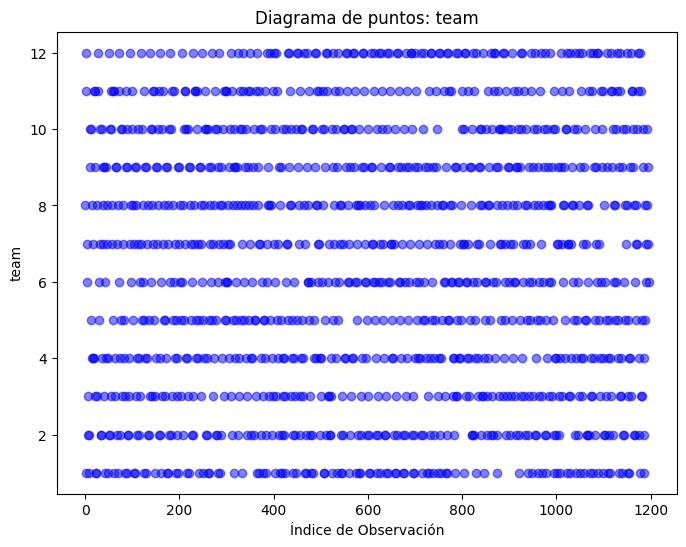

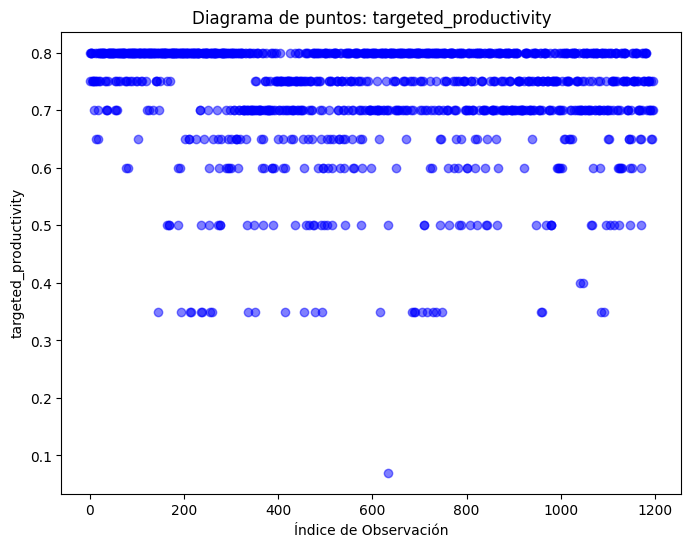

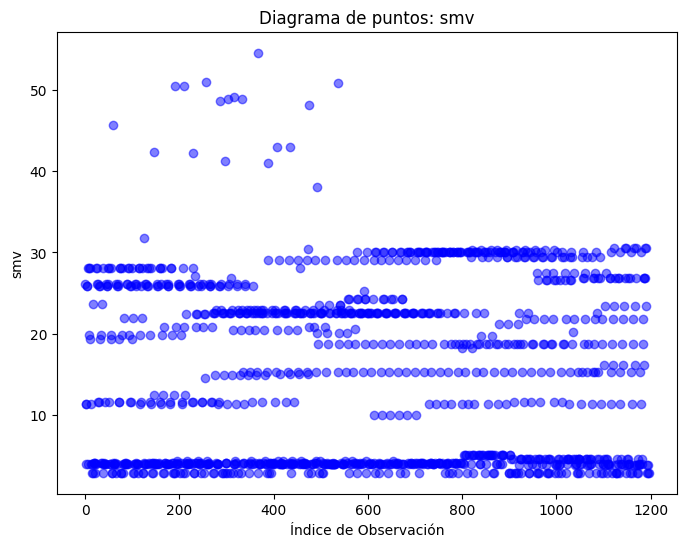

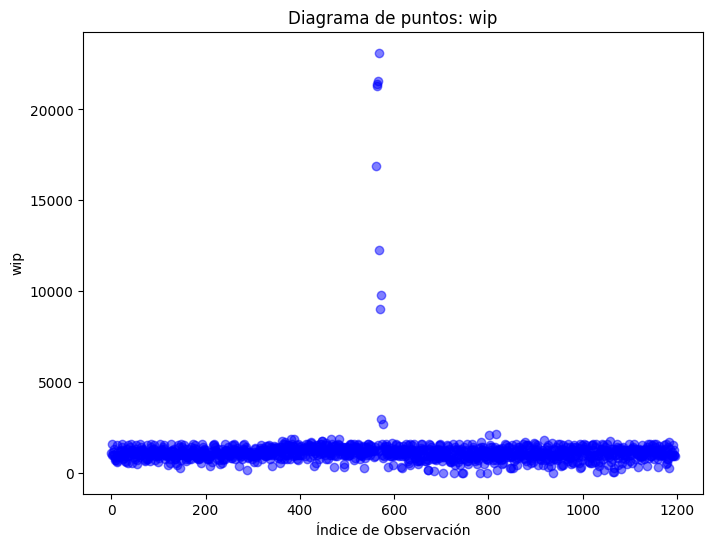

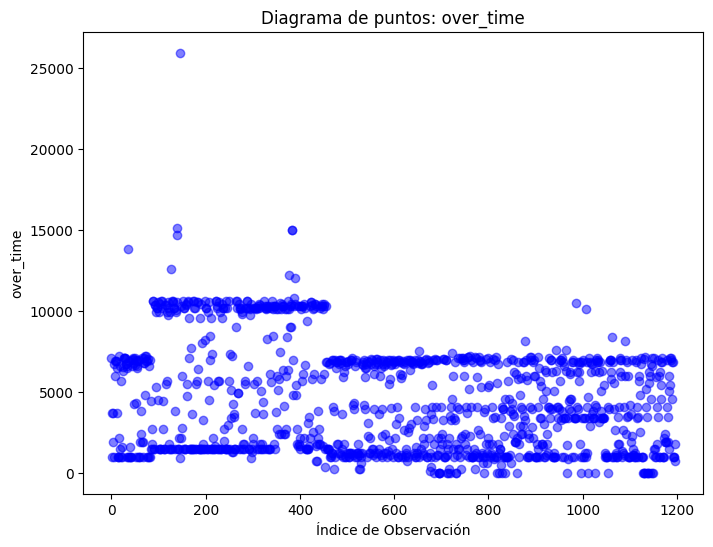

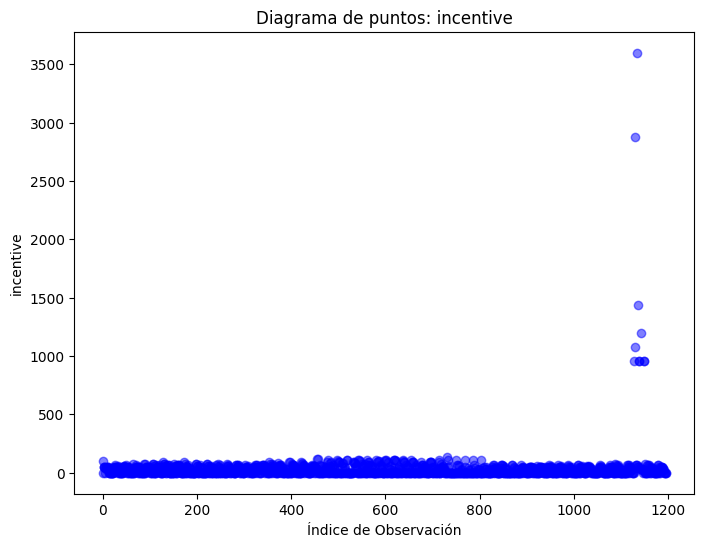

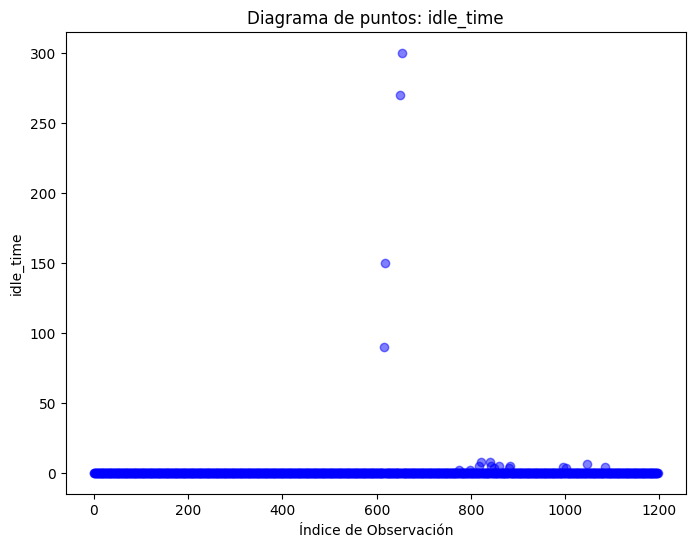

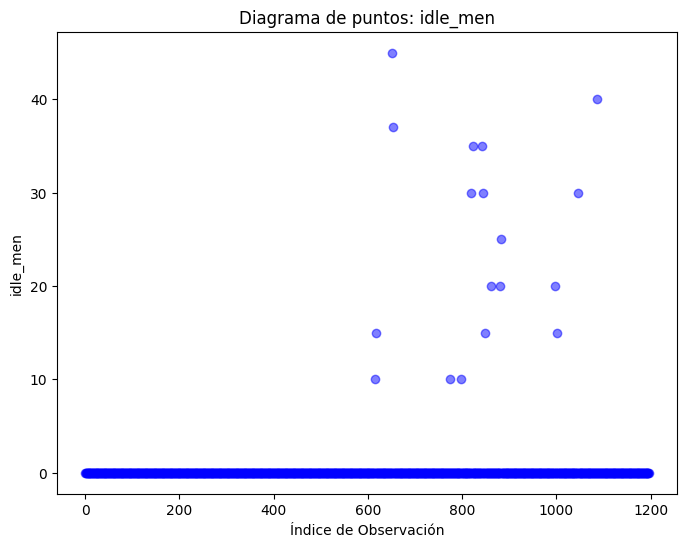

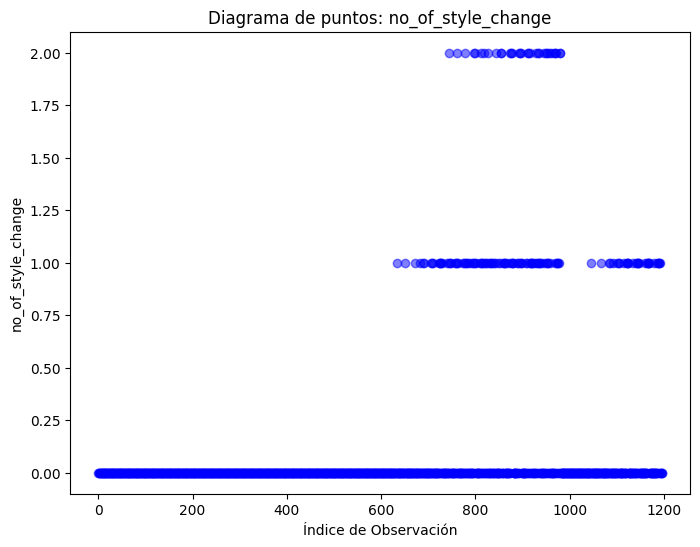

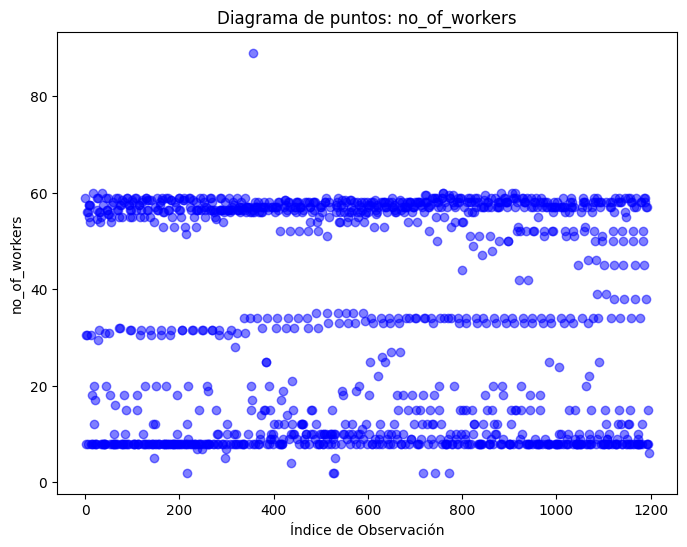

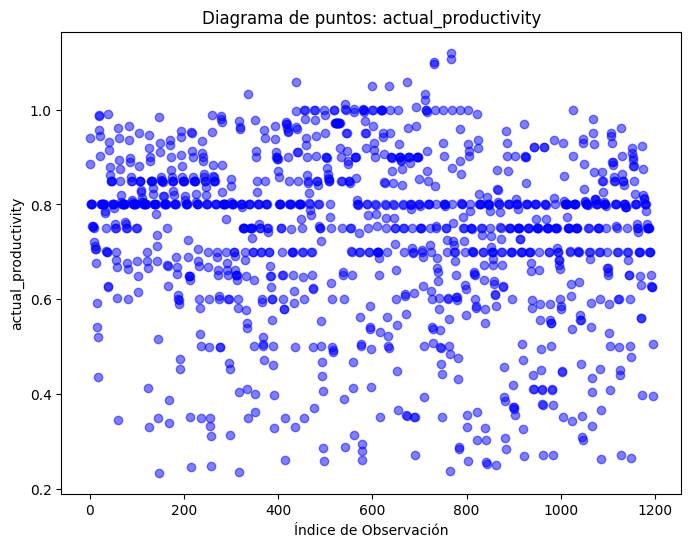

In [80]:
import matplotlib.pyplot as plt

numeric_variables = data.select_dtypes(include=['float64', 'int64'])

# Generar diagrama de puntos para cada variable numérica
for column in numeric_variables.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(data.index, data[column], alpha=0.5, color='blue')
    plt.title(f'Diagrama de puntos: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    plt.show()

## Exploración de datos

In [81]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1198.735765,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1404.692047,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,925.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1096.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1326.280702,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [82]:
data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1609.196429,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [83]:
import seaborn as sns

In [84]:
%matplotlib inline

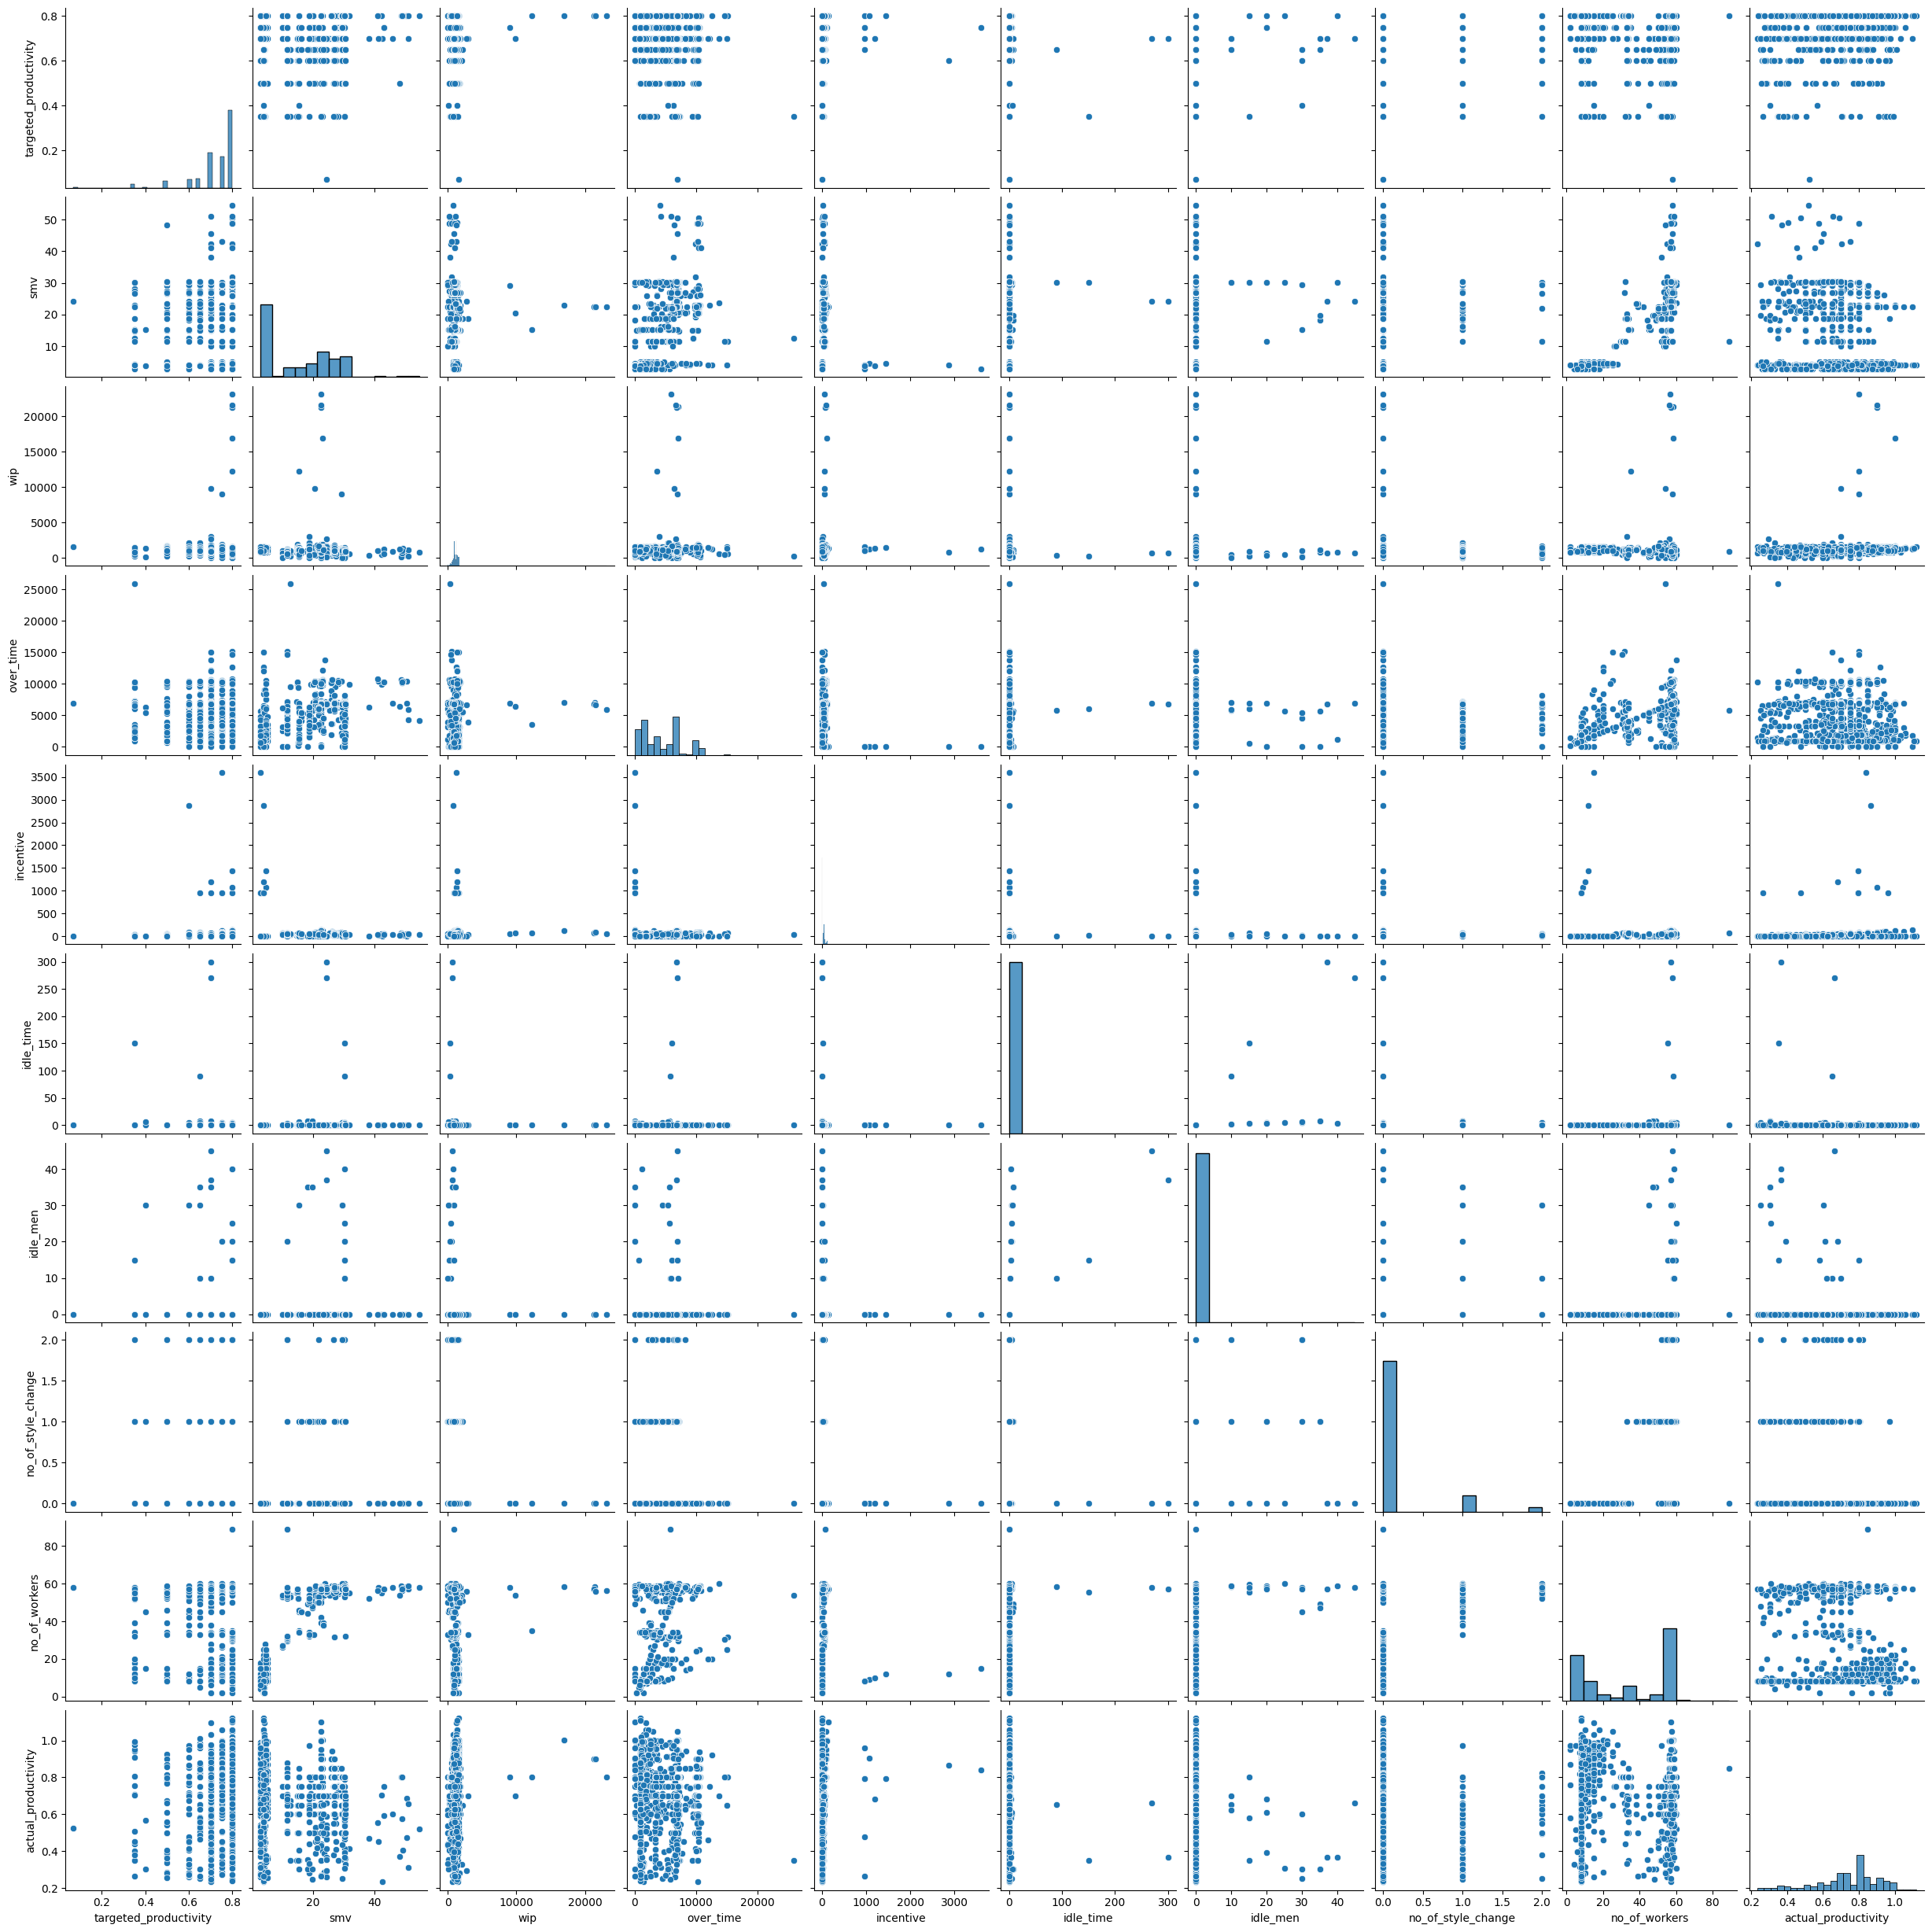

In [85]:
features=["targeted_productivity","smv","wip","over_time","incentive","idle_time","idle_men","no_of_style_change","no_of_workers","actual_productivity"]
data_filtered=data[features]

sns.pairplot(data_filtered,)

Matriz de correlación

<Axes: >

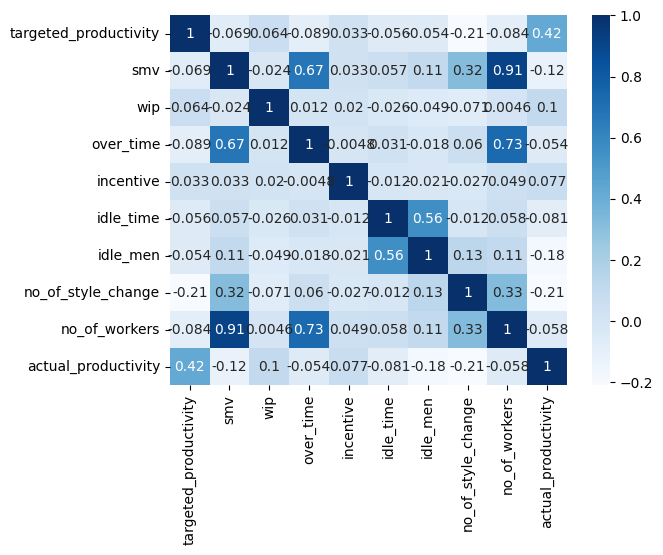

In [86]:
import seaborn as sb
corr = data_filtered.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

Gráficos de violín

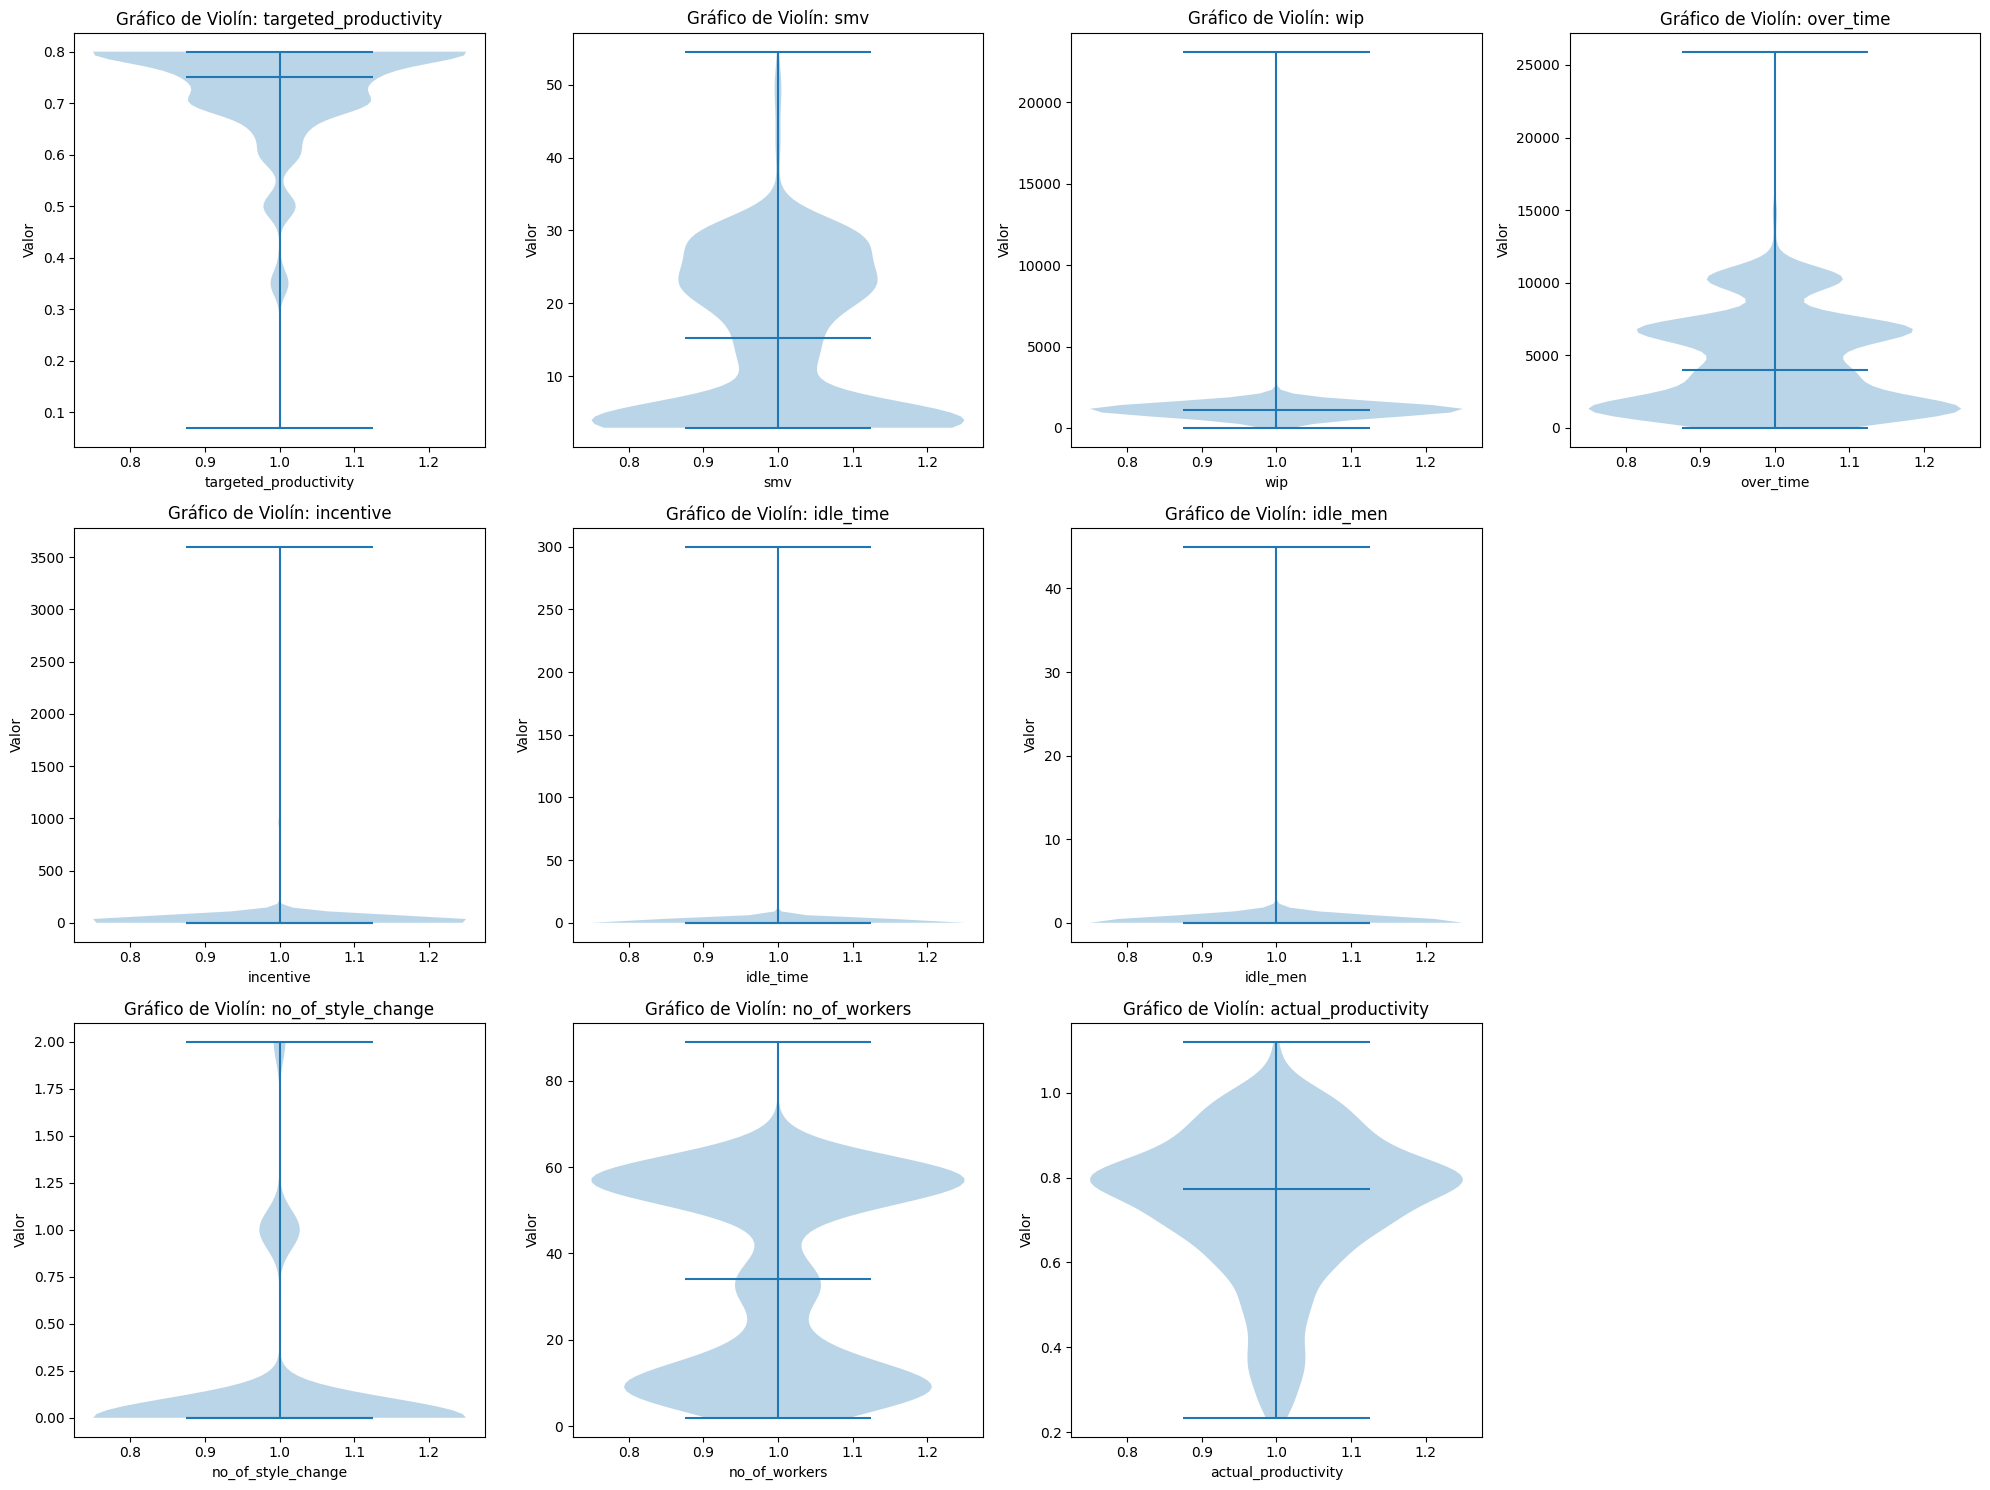

In [87]:
fig = plt.figure(figsize=(20, 15))  # Ajusta el tamaño general de la figura

for i, column in enumerate([col for col in numeric_variables.columns if col != "team"][:4]):
    ax = fig.add_subplot(3, 4, i+1)  # 3 filas, 4 columnas, posición i+1
    ax.violinplot(data[column], showmeans=False, showmedians=True)
    ax.set_title(f'Gráfico de Violín: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Valor')

for i, column in enumerate([col for col in numeric_variables.columns if col != "team"][4:7], start=4):
    ax = fig.add_subplot(3, 4, i+1)
    ax.violinplot(data[column], showmeans=False, showmedians=True)
    ax.set_title(f'Gráfico de Violín: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Valor')

for i, column in enumerate([col for col in numeric_variables.columns if col != "team"][7:10], start=8):
    ax = fig.add_subplot(3, 4, i+1) 
    ax.violinplot(data[column], showmeans=False, showmedians=True)
    ax.set_title(f'Gráfico de Violín: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Valor')

plt.tight_layout()
plt.show()

plt.show()

Histogramas

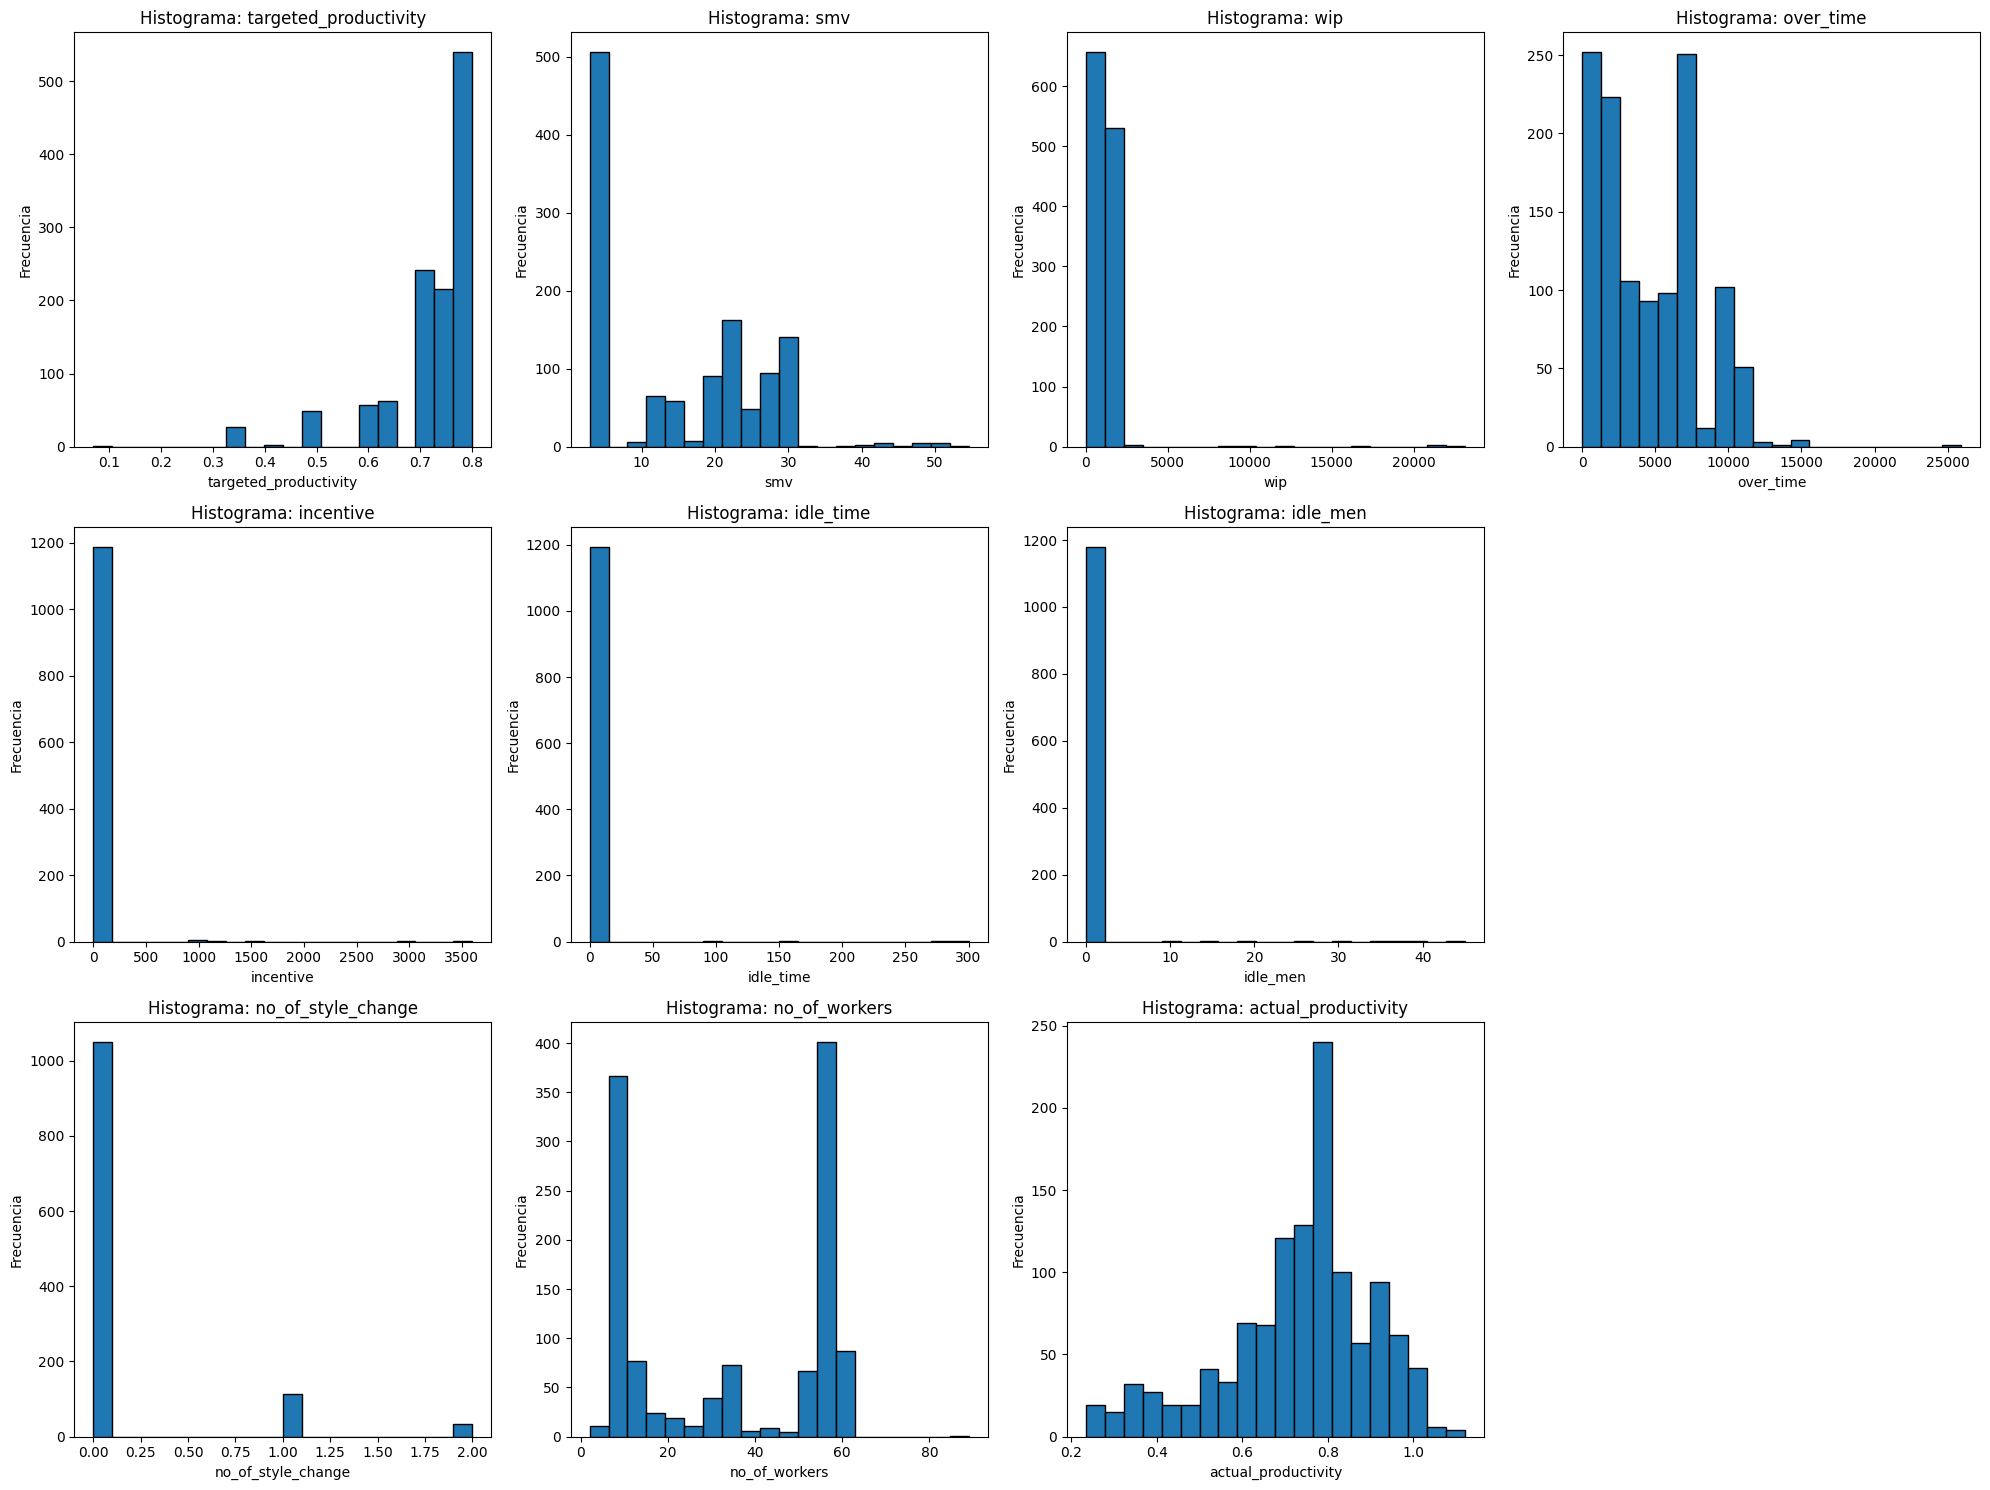

In [88]:
fig = plt.figure(figsize=(20, 15))


for i, column in enumerate([col for col in numeric_variables.columns if col != "team"][:4]):
    ax = fig.add_subplot(3, 4, i+1)  
    ax.hist(data[column], bins=20, edgecolor='black') 
    ax.set_title(f'Histograma: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')


for i, column in enumerate([col for col in numeric_variables.columns if col != "team"][4:7], start=4):
    ax = fig.add_subplot(3, 4, i+1)
    ax.hist(data[column], bins=20, edgecolor='black')
    ax.set_title(f'Histograma: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

for i, column in enumerate([col for col in numeric_variables.columns if col != "team"][7:10], start=8):
    ax = fig.add_subplot(3, 4, i+1) 
    ax.hist(data[column], bins=20, edgecolor='black')  
    ax.set_title(f'Histograma: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()  
plt.show()

Tendencias entre variables de entrada y respuesta

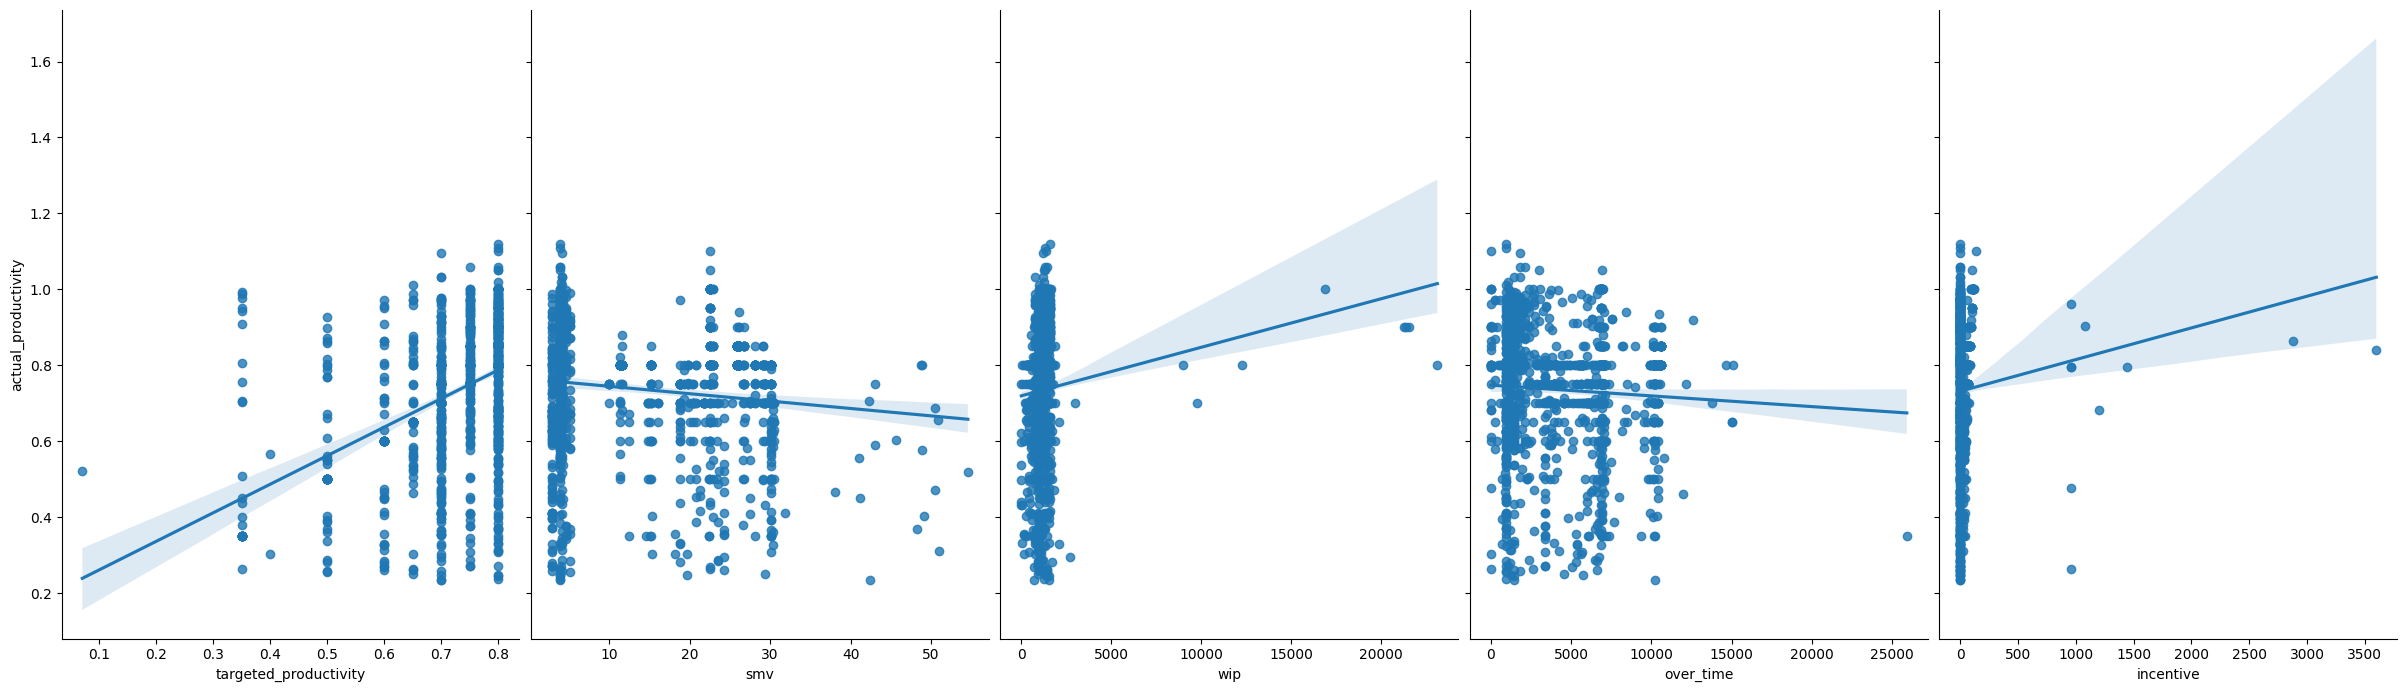

In [89]:
sns.pairplot(data, x_vars=["targeted_productivity","smv","wip","over_time","incentive"], y_vars="actual_productivity", height=7, aspect=0.7, kind='reg')

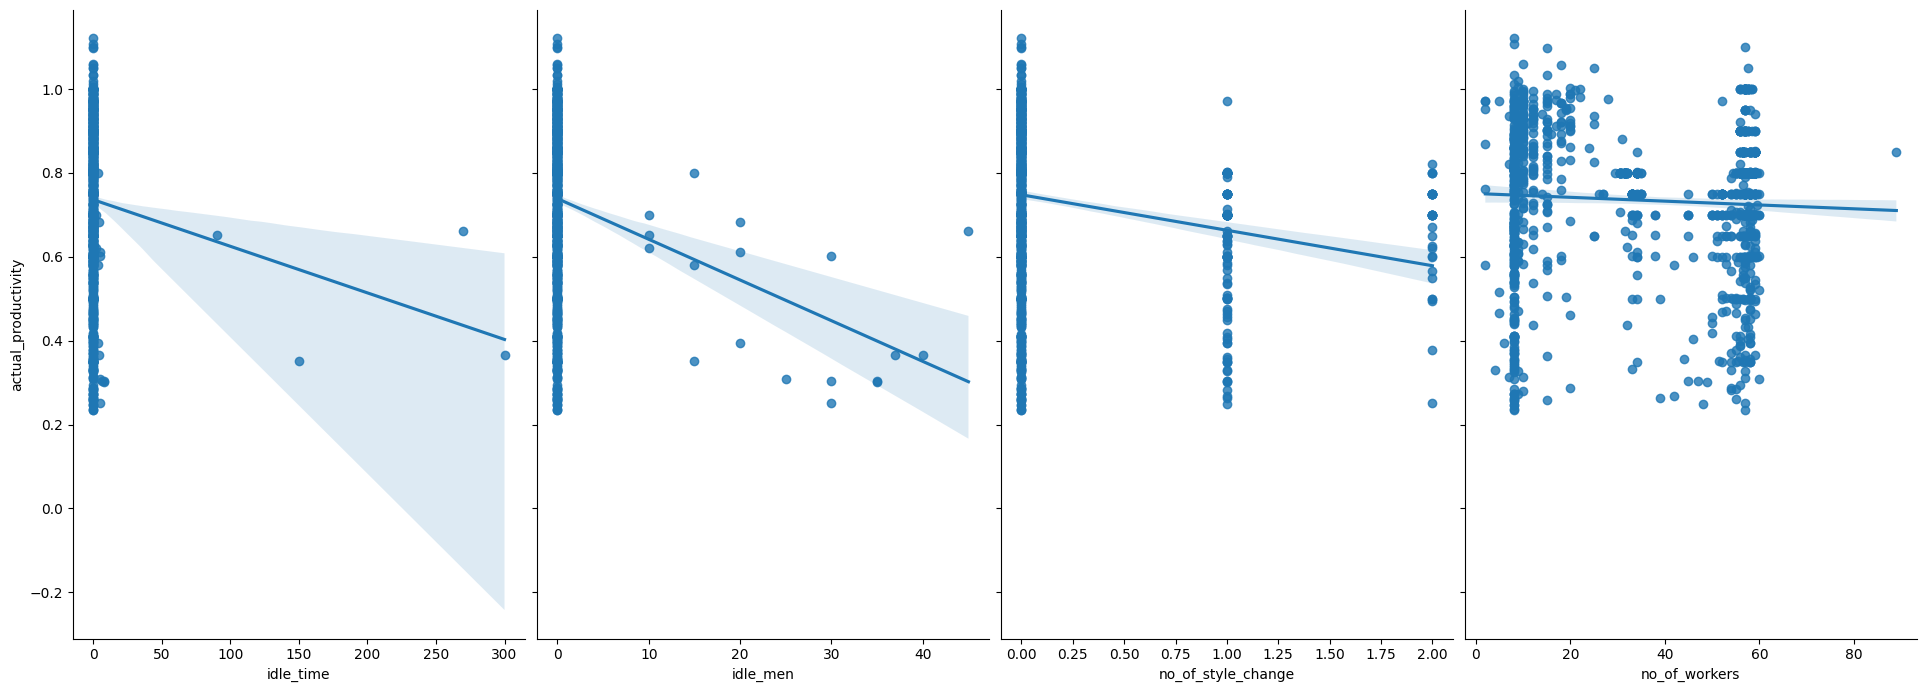

In [90]:
sns.pairplot(data, x_vars=["idle_time","idle_men","no_of_style_change","no_of_workers"], y_vars="actual_productivity", height=7, aspect=0.7, kind='reg')

Algunas visualizaciones de interés

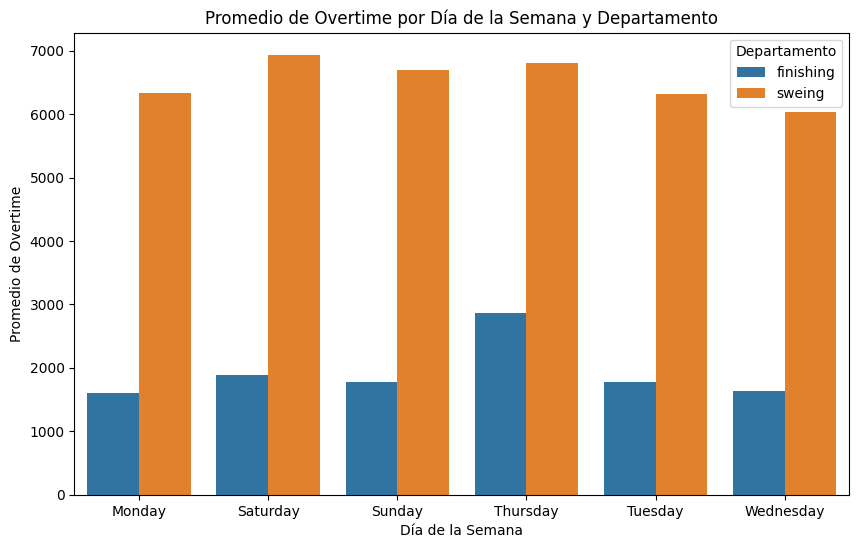

In [91]:
# Agrupar los datos por departamento y día de la semana y calcular el promedio de overtime
grouped_data = data.groupby(['department', 'day'])['over_time'].mean().reset_index()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='over_time', hue='department', data=grouped_data)
plt.title('Promedio de Overtime por Día de la Semana y Departamento')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Overtime')
plt.legend(title='Departamento')
plt.show()

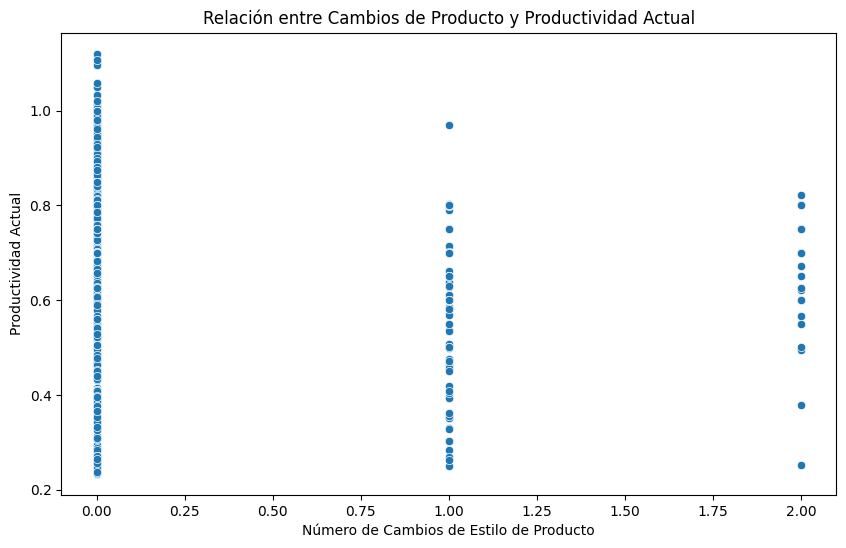

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='no_of_style_change', y='actual_productivity')
plt.title('Relación entre Cambios de Producto y Productividad Actual')
plt.xlabel('Número de Cambios de Estilo de Producto')
plt.ylabel('Productividad Actual')
plt.show()

## Division por equipos

In [93]:
uno = data[data['team'] == 1]
dos = data[data['team'] == 2]
tres = data[data['team'] == 3]
cuatro = data[data['team'] == 4]
cinco = data[data['team'] == 5]
seis = data[data['team'] == 6]
siete = data[data['team'] == 7]
ocho = data[data['team'] == 8]
nueve = data[data['team'] == 9]
diez = data[data['team'] == 10]
once = data[data['team'] == 11]
doce = data[data['team'] == 12]


## Modelos

### Modelo con todas las variables

Variables explicativas

In [94]:
features = ["day","quarter","department","team","no_of_workers","no_of_style_change","targeted_productivity","smv","wip","over_time","incentive","idle_time","idle_men"]
X = data[features]
X = pd.get_dummies(X, columns=['day', 'team', 'quarter', 'department'], dtype=int, drop_first=True)

X.head()

X.shape

(1197, 30)

Variables de respuesta

In [95]:
Y=data["actual_productivity"]

Y.head()

Y.shape

(1197,)

In [96]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)


Regresión y resultados

In [97]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.353
Model:                             OLS   Adj. R-squared:                  0.332
Method:                  Least Squares   F-statistic:                     16.80
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           5.79e-68
Time:                         12:43:32   Log-Likelihood:                 527.67
No. Observations:                  957   AIC:                            -993.3
Df Residuals:                      926   BIC:                            -842.6
Df Model:                           30                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

Verificacion de multicolinialidad con estos datos

In [98]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)

                 Variable        VIF
1           no_of_workers  21.121234
2      no_of_style_change   1.478017
3   targeted_productivity   1.143699
4                     smv   7.055434
5                     wip   1.090576
6               over_time   2.617388
7               incentive   1.062081
8               idle_time   1.509257
9                idle_men   1.572741
10           day_Saturday   1.802762
11             day_Sunday   1.755803
12           day_Thursday   1.815920
13            day_Tuesday   1.742997
14          day_Wednesday   1.764653
15                 team_2   1.864828
16                 team_3   1.780694
17                 team_4   1.862189
18                 team_5   1.820184
19                 team_6   2.224949
20                 team_7   1.811520
21                 team_8   1.914843
22                 team_9   1.832035
23                team_10   1.808102
24                team_11   1.896129
25                team_12   2.279992
26       quarter_Quarter2   1.465441
2

### Modelo con las variables significativas

Variables explicativas

In [99]:
features = ["department","team","no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = data[features]
X = pd.get_dummies(X, columns=[ 'team', 'department'], dtype=int, drop_first=True)

X.head()

X.shape

(1197, 17)

Variables de respuesta

In [100]:
Y=data["actual_productivity"]

Y.head()

Y.shape

(1197,)

In [101]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)


Regresión y resultados

In [102]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.333
Model:                             OLS   Adj. R-squared:                  0.321
Method:                  Least Squares   F-statistic:                     27.58
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           6.05e-71
Time:                         12:43:32   Log-Likelihood:                 513.46
No. Observations:                  957   AIC:                            -990.9
Df Residuals:                      939   BIC:                            -903.4
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

Verificacion de la multicolinialidad

In [103]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)

                 Variable        VIF
1           no_of_workers  21.121234
2      no_of_style_change   1.478017
3   targeted_productivity   1.143699
4                     smv   7.055434
5                     wip   1.090576
6               over_time   2.617388
7               incentive   1.062081
8               idle_time   1.509257
9                idle_men   1.572741
10           day_Saturday   1.802762
11             day_Sunday   1.755803
12           day_Thursday   1.815920
13            day_Tuesday   1.742997
14          day_Wednesday   1.764653
15                 team_2   1.864828
16                 team_3   1.780694
17                 team_4   1.862189
18                 team_5   1.820184
19                 team_6   2.224949
20                 team_7   1.811520
21                 team_8   1.914843
22                 team_9   1.832035
23                team_10   1.808102
24                team_11   1.896129
25                team_12   2.279992
26       quarter_Quarter2   1.465441
2

### Modelo con variables significativas y sin el departamento

Variables explicativas

In [110]:
features = ["team","no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = data[features]
X = pd.get_dummies(X, columns=['team'], dtype=int, drop_first=True)

X.head()

X.shape

(1197, 16)

Variables de respuesta

In [111]:
Y=data["actual_productivity"]

Y.head()

Y.shape

(1197,)

In [112]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)



Regresión y resultados

In [113]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.332
Model:                             OLS   Adj. R-squared:                  0.321
Method:                  Least Squares   F-statistic:                     29.25
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           1.66e-71
Time:                         12:44:56   Log-Likelihood:                 513.03
No. Observations:                  957   AIC:                            -992.1
Df Residuals:                      940   BIC:                            -909.4
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

Verificacion de la multicolinialidad

In [118]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)

                 Variable       VIF
1           no_of_workers  6.848168
2   targeted_productivity  1.079188
3                     smv  6.804794
4               incentive  1.010044
5                idle_men  1.032861
6                  team_2  1.855152
7                  team_3  1.756885
8                  team_4  1.833931
9                  team_5  1.788482
10                 team_6  1.769514
11                 team_7  1.793677
12                 team_8  1.882768
13                 team_9  1.819327
14                team_10  1.796080
15                team_11  1.824729
16                team_12  1.808016
